In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.shape

(418, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 36% from passenger who actually survived!<br>
Most passengers' ages ranged from 21 to 39 years old.<br>
Few who paid the most expensive fare(512).<br>

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Most of the passerngers were males.<br>
Most of the passengers travelled from the same port(Southampton).

In [9]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


all survived passengers were actually women.

In [11]:
data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,1.0
1,male,0.0


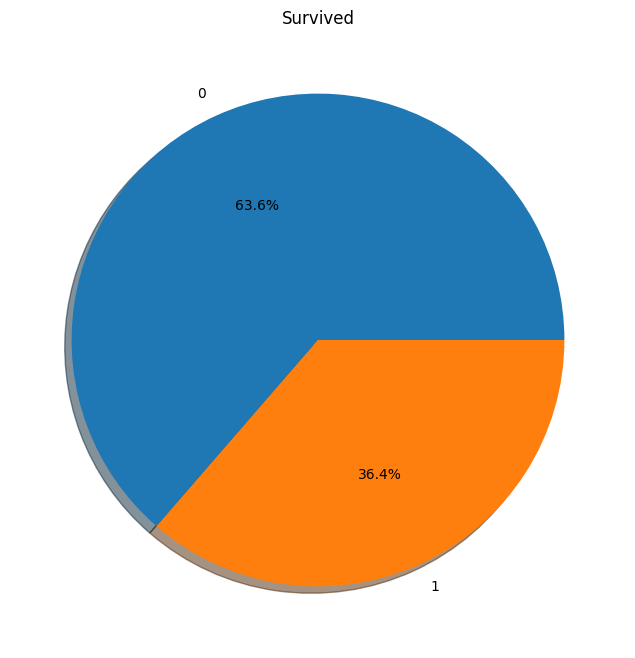

In [12]:
plt.figure(figsize=(18,8))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
plt.title('Survived');
plt.ylabel('');

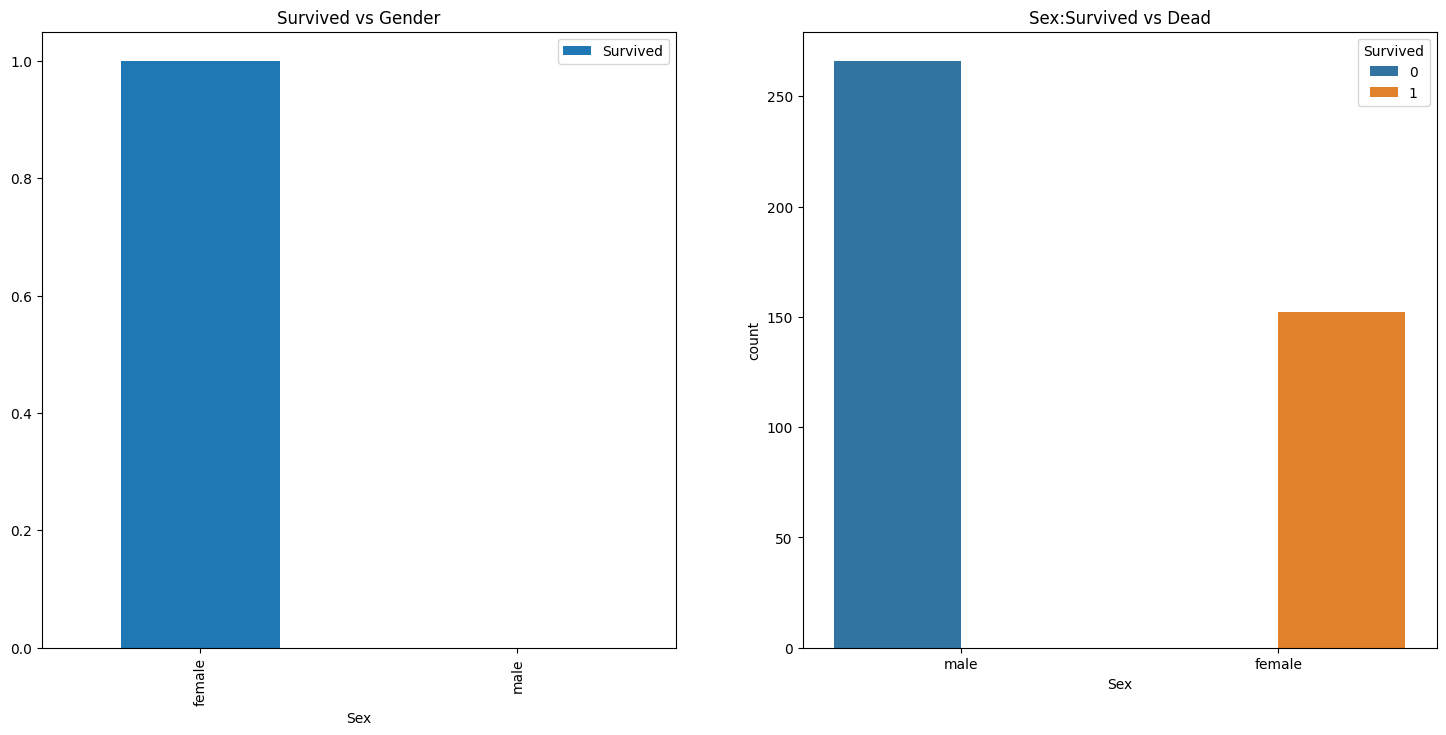

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Gender')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

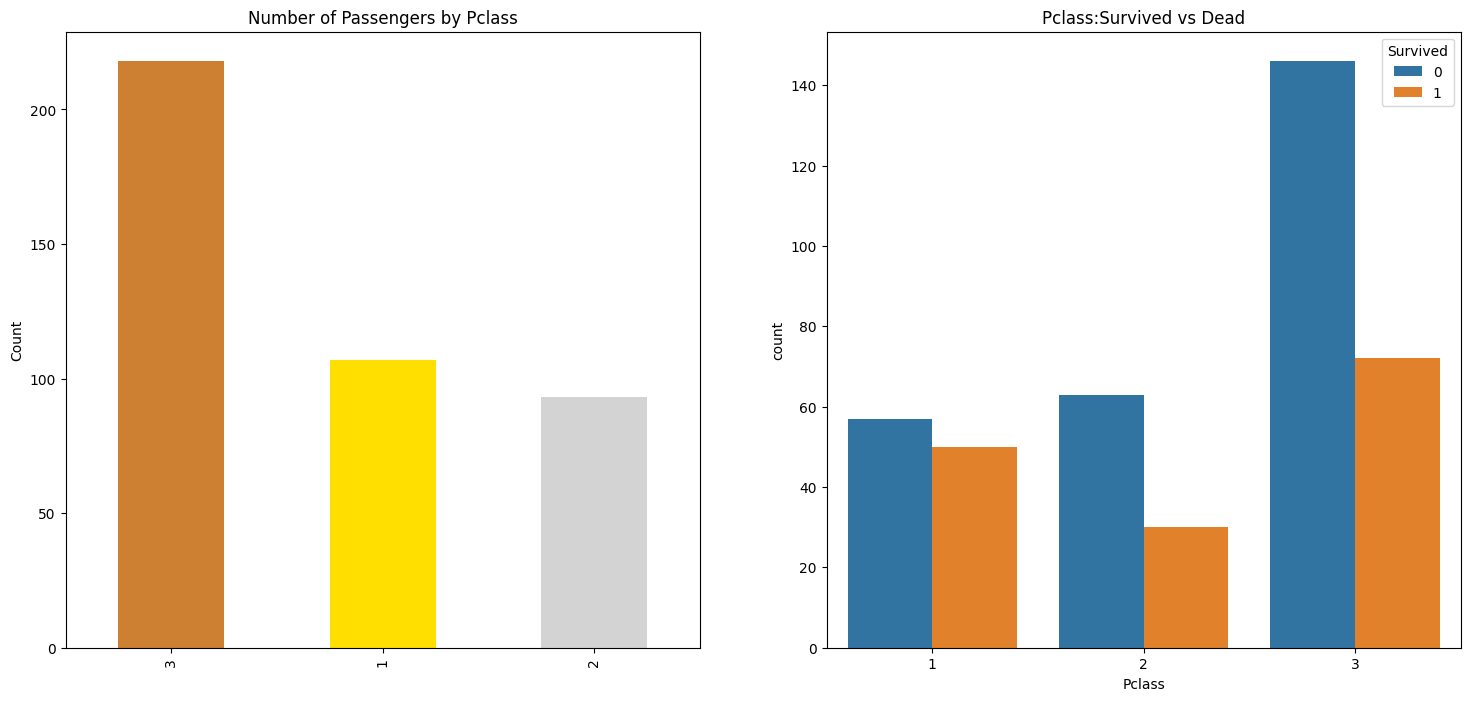

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

<Figure size 1400x1200 with 0 Axes>

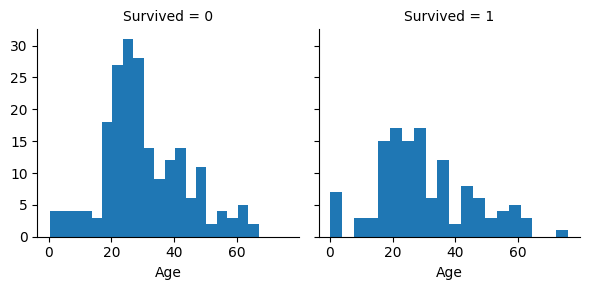

In [15]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(data,col='Survived')
g.map(plt.hist,'Age',bins=20);

<Figure size 1400x1200 with 0 Axes>

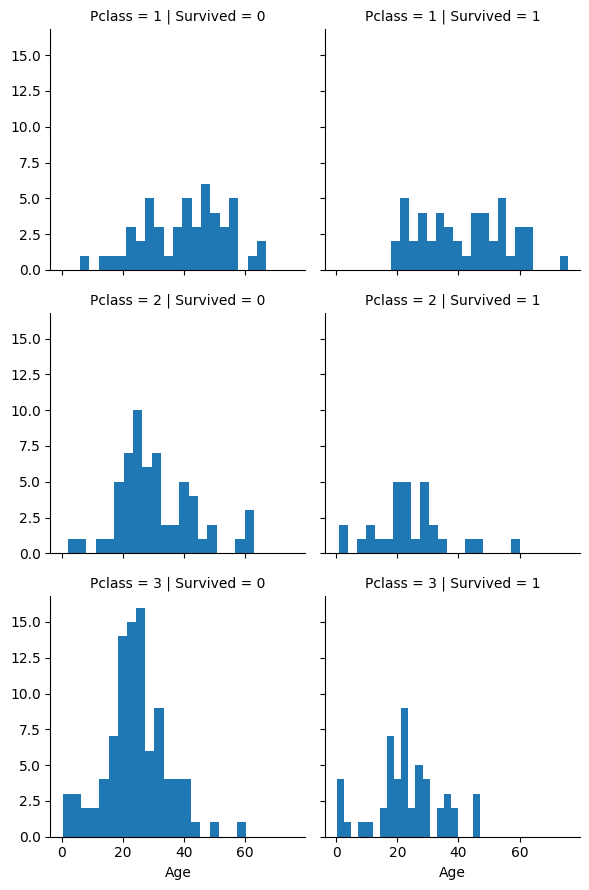

In [16]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(data,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20);

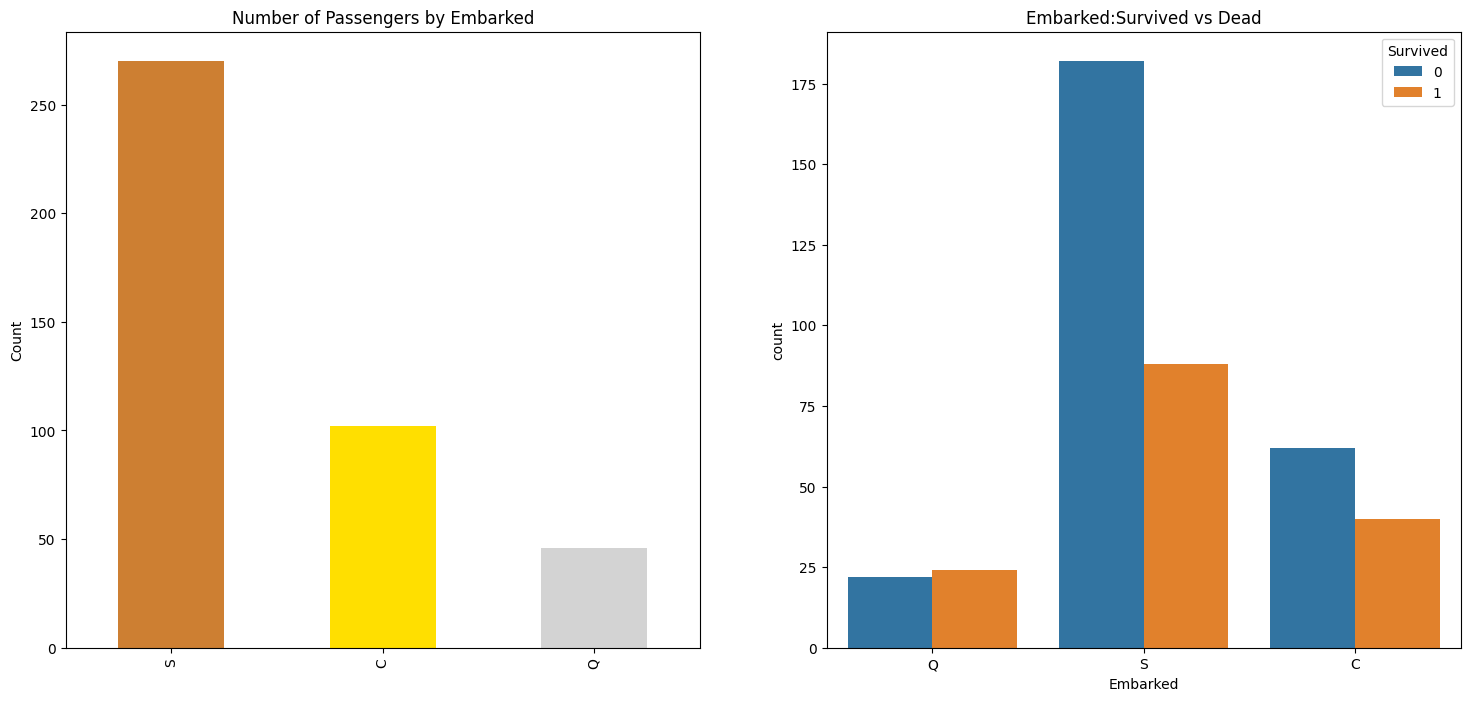

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Embarked')
ax[0].set_ylabel('Count')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

Drop unnecessary columns

In [18]:
data=data.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)

Mapping to convert categorical data to numerical " for modeling"

In [19]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
emb_map={'C':1,'S':2,'Q':3}
data['Embarked']=data['Embarked'].map(emb_map).astype(int)

Dealing with missing values

In [22]:
data.fillna((data.mean()), inplace=True)

Splitting the data

In [24]:
X = data.drop(['Survived'],axis='columns')
y = data.Survived

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**ML**

In [28]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [29]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [30]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

In [31]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 1.0,
 'KNN': 0.9523809523809524,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'Gradient Boosting Classifier': 1.0,
 'Support Vector Machine': 0.9880952380952381,
 'Stochastic Gradien Descent': 1.0,
 'Naive Bayes': 1.0,
 'xgb Classifier': 1.0}

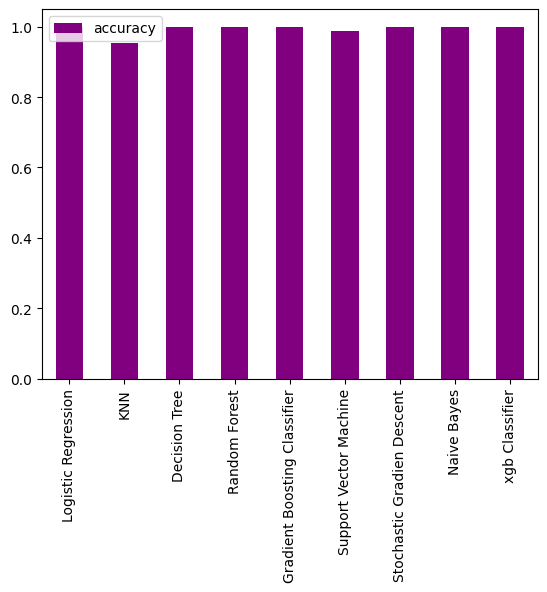

In [44]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="purple");

**Logistic Regression**

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

<Axes: >

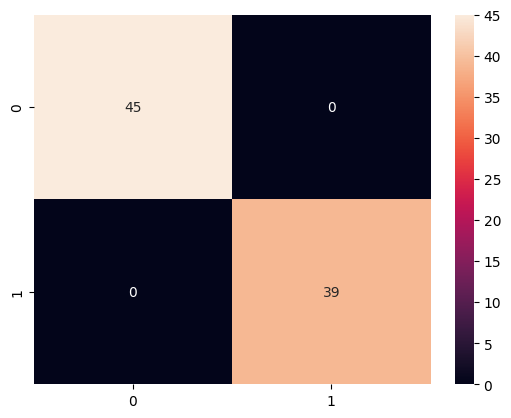

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)

In [39]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Decision Tree**

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

<Axes: >

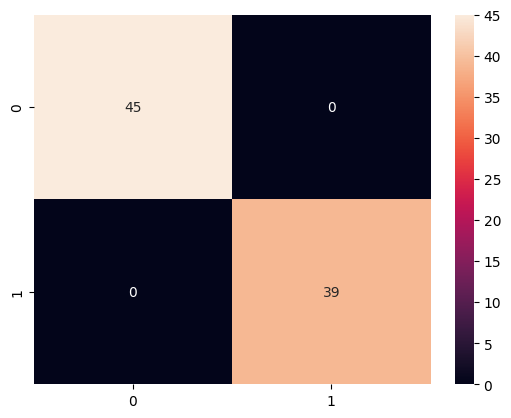

In [41]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred1)) , annot=True)

In [42]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

